<a href="https://colab.research.google.com/github/lydiateinfalt/DATS6202-MachineLearningI-Fall2021/blob/main/LydiaTeinfalt_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size='5'>
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size='4'>
Part 3, Chapter 2, Section 4: Recurrent Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size='4'>
Homework 6
</font>
</center>
</p>

<p>
<center>
<font size='3'>
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size='3'>
Prof. Yuxiao Huang
</font>
</center>
</p>
</b>

<p>
<center>
<font size='3'>
Student Name: Lydia Teinfalt
</font>
</center>
</p>
</b>

<p>
<center>
<font size='3'>
Last Updated: 12/03/2021
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 6 for Recurrent Neural Networks (Part 3, Chapter 2, Section 4).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/fall_2020/slides/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s4_recurrent_neural_networks).
- Here we will work on TensorFlow Dataset [yelp_polarity_reviews](https://www.tensorflow.org/datasets/catalog/yelp_polarity_reviews).
- The goal of this homework is tweaking the pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s4 recurrent_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2020/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s4_recurrent_neural_networks/case_study/case_study.ipynb) to make it work for the new dataset mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is 0.90. As per the grading rubrics (section 15 of the syllabus), if the test score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named homework_6.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_6/.

# Notebook Configuration

## Google drive

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/DATS 6202/HW6'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/DATS 6202/code/utilities/p3_deep_learning/'

Mounted at /content/drive


## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [6]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/DATS 6202/code/utilities/p3_deep_learning


## Loading data

In this case study, we will work on the  TensorFlow Dataset [yelp_polarity_reviews](https://www.tensorflow.org/datasets/catalog/yelp_polarity_reviews).

### Creating the directory for the data

In [7]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + 'data/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Downloading data to the directory

In [8]:
import tensorflow_datasets as tfds

# Get the name of the data
data_name = "yelp_polarity_reviews"

# Load data
data, info = tfds.load(name=data_name,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True,
                       with_info=True)

## Getting the name of the target

In [9]:
target = 'label'

## Getting the info

In [10]:
# Print the splits
info.splits

{'test': <tfds.core.SplitInfo num_examples=38000>,
 'train': <tfds.core.SplitInfo num_examples=560000>}

In [11]:
# Get the classes
classes = info.features['label'].names

# Print the classes
classes

['1', '2']

In [12]:
# Get the number of classes
n_classes = info.features['label'].num_classes

# Print the number of classes
info.features['label'].num_classes

2

## Getting the training, validation and test data

In [13]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + '/data/',
                      as_supervised=True)

## Batching and prefetching the data

In [14]:
# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the testing data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

## Creating the directory for the model

In [15]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result6/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [16]:
# Get the model
model = keras.Sequential([hub.KerasLayer('https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1',
                                         trainable=False,
                                         dtype=tf.string,
                                         input_shape=[],
                                         output_shape=[50]),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])

# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48,197,257
Trainable params: 6,657
Non-trainable params: 48,190,600
_________________________________________________________________


## Freezing the pretrained layers

In [17]:
# Freeze the pretrained layers
model.layers[0].trainable = False

# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48,197,257
Trainable params: 6,657
Non-trainable params: 48,190,600
_________________________________________________________________


## Setting Callbacks

In [18]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result6/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=5)

## Compiling the model
Here we use the default learning rate of Adam optimizer.

In [19]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=10 ** -3),
              loss='binary_crossentropy',    
              metrics=['accuracy'])

## Training the model

In [20]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
24500/24500 [==============================] - 210s 8ms/step - loss: 0.4418 - accuracy: 0.7907 - val_loss: 0.4308 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 2/10
24500/24500 [==============================] - 197s 8ms/step - loss: 0.4287 - accuracy: 0.7984 - val_loss: 0.4274 - val_accuracy: 0.7988 - lr: 0.0010
Epoch 3/10
24500/24500 [==============================] - 197s 8ms/step - loss: 0.4249 - accuracy: 0.8006 - val_loss: 0.4261 - val_accuracy: 0.7998 - lr: 0.0010
Epoch 4/10
24500/24500 [==============================] - 197s 8ms/step - loss: 0.4224 - accuracy: 0.8019 - val_loss: 0.4250 - val_accuracy: 0.8002 - lr: 0.0010
Epoch 5/10
24500/24500 [==============================] - 198s 8ms/step - loss: 0.4206 - accuracy: 0.8028 - val_loss: 0.4247 - val_accuracy: 0.8005 - lr: 0.0010
Epoch 6/10
24500/24500 [==============================] - 199s 8ms/step - loss: 0.4192 - accuracy: 0.8035 - val_loss: 0.4237 - val_accuracy: 0.8008 - lr: 0.0010
Epoch 7/10
24500/24500 [==========

## Plotting the learning curve

### Creating the directory for the figure

In [21]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result6/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

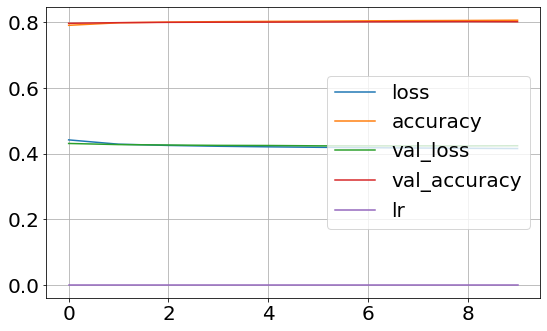

In [22]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result6/figure/learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the pretrained layers

In [23]:
# Unfreeze the pretrained layers
model.layers[0].trainable = True

# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48,197,257
Trainable params: 48,197,257
Non-trainable params: 0
_________________________________________________________________


## Compiling the model
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights.

In [24]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=10 ** -4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training the model

In [25]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
24500/24500 [==============================] - 470s 19ms/step - loss: 0.2265 - accuracy: 0.9051 - val_loss: 0.1943 - val_accuracy: 0.9212 - lr: 1.0000e-04
Epoch 2/10
24500/24500 [==============================] - 470s 19ms/step - loss: 0.1652 - accuracy: 0.9346 - val_loss: 0.1875 - val_accuracy: 0.9247 - lr: 1.0000e-04
Epoch 3/10
24500/24500 [==============================] - 468s 19ms/step - loss: 0.1466 - accuracy: 0.9431 - val_loss: 0.1872 - val_accuracy: 0.9253 - lr: 1.0000e-04
Epoch 4/10
24500/24500 [==============================] - 466s 19ms/step - loss: 0.1326 - accuracy: 0.9494 - val_loss: 0.1893 - val_accuracy: 0.9256 - lr: 1.0000e-04
Epoch 5/10
24500/24500 [==============================] - 466s 19ms/step - loss: 0.1199 - accuracy: 0.9552 - val_loss: 0.1929 - val_accuracy: 0.9254 - lr: 1.0000e-04
Epoch 6/10
24500/24500 [==============================] - 467s 19ms/step - loss: 0.1078 - accuracy: 0.9606 - val_loss: 0.1983 - val_accuracy: 0.9246 - lr: 1.0000e-04
Epoc

## Plotting the learning curve

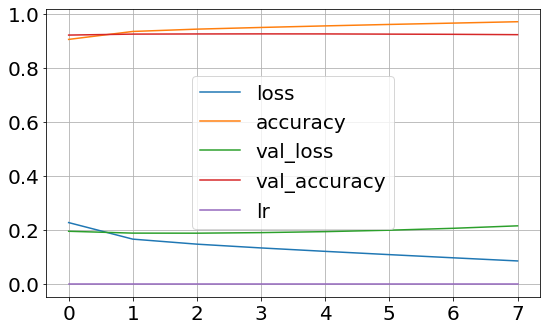

In [26]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result6/figure/learning_curve_after_unfreezing.pdf')
plt.show()

# Testing

## Loading the saved model

In [27]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result6/model/model.h5')

## Evaluating the model

Loss = 0.1806
Accuracy = 0.9282

In [28]:
loss, accuracy = model.evaluate(data_test)

2375/2375 [==============================] - 15s 6ms/step - loss: 0.1806 - accuracy: 0.9282


# Reference

The deep utitilities and pipeline implemented in [/p3 c2 s4 recurrent_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2020/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s4_recurrent_neural_networks/case_study/case_study.ipynb)

-Huang, Yuxiao, 2021. "Machine Learning I". Fall 2021